In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import SINGLE_RUN_STOCK_DICT_PKL, SINGLE_RUN_RETURNS_PKL, DATE_GS_CUTOFF

with open(SINGLE_RUN_RETURNS_PKL, 'rb') as f:
    returns = pickle.load(f)


In [10]:
with open(SINGLE_RUN_STOCK_DICT_PKL, 'rb') as f:
    dictt = pickle.load(f)

dictt

{'2007-01-31': array(['RIMM', 'PD', 'CMCSA', 'GS', 'X', 'T', 'HPQ', 'CSCO'], dtype=object),
 '2007-02-28': array(['RIMM', 'PD', 'X', 'GS', 'GM', 'T', 'CMCSA', 'AAPL'], dtype=object),
 '2007-03-30': array(['X', 'RIMM', 'AAPL', 'T', 'GS', 'MRO', 'CMCSA', 'ORCL'],
       dtype=object),
 '2007-04-30': array(['X', 'RIMM', 'AAPL', 'MRK', 'T', 'GS', 'MRO', 'CVX'], dtype=object),
 '2007-05-31': array(['RIMM', 'AAPL', 'X', 'MRO', 'T', 'MRK', 'GS', 'NVDA'], dtype=object),
 '2007-06-29': array(['RIMM', 'AAPL', 'NVDA', 'X', 'RIG', 'MRO', 'SLB', 'T'],
       dtype=object),
 '2007-07-31': array(['RIMM', 'NVDA', 'AAPL', 'SLB', 'RIG', 'CSCO', 'X', 'AMAT'],
       dtype=object),
 '2007-08-31': array(['AAPL', 'NVDA', 'SLB', 'RIG', 'CSCO', 'IBM', 'X', 'INTC'],
       dtype=object),
 '2007-09-28': array(['AAPL', 'NVDA', 'SLB', 'X', 'RIG', 'EEM', 'OIH', 'COP'],
       dtype=object),
 '2007-10-31': array(['AAPL', 'GOOG', 'EEM', 'RIG', 'NVDA', 'OXY', 'SLB', 'X'],
       dtype=object),
 '2007-11-30': array(['

In [11]:
# dictt
filtered_keys = {k: v for k, v in dictt.items() if k > DATE_GS_CUTOFF}
filtered_keys

{'2018-01-31': array(['BA', 'NVDA', 'NFLX', 'BABA', 'XIV', 'AMZN', 'MU', 'JD'],
       dtype=object),
 '2018-02-28': array(['NFLX', 'NVDA', 'BA', 'MU', 'AMZN', 'BABA', 'MSFT', 'JD'],
       dtype=object),
 '2018-03-29': array(['NFLX', 'NVDA', 'MU', 'BA', 'UCO', 'AMZN', 'INTC', 'BABA'],
       dtype=object),
 '2018-04-30': array(['NFLX', 'UCO', 'NVDA', 'AMZN', 'BA', 'MU', 'INTC', 'CSCO'],
       dtype=object),
 '2018-05-31': array(['NFLX', 'MU', 'UCO', 'BA', 'AMZN', 'NVDA', 'INTC', 'BABA'],
       dtype=object),
 '2018-06-29': array(['NFLX', 'UCO', 'AMZN', 'MU', 'BA', 'NKE', 'NVDA', 'XOP'],
       dtype=object),
 '2018-07-31': array(['AMZN', 'NFLX', 'UCO', 'AMD', 'MU', 'MSFT', 'BA', 'NVDA'],
       dtype=object),
 '2018-08-31': array(['AMD', 'AMZN', 'NFLX', 'UCO', 'NVDA', 'NKE', 'AAPL', 'MSFT'],
       dtype=object),
 '2018-09-28': array(['AMD', 'AMZN', 'UCO', 'NFLX', 'NKE', 'NVDA', 'AAPL', 'MSFT'],
       dtype=object),
 '2018-10-31': array(['AMD', 'MRK', 'AAPL', 'PFE', 'BA', 'NKE', 'M

In [12]:
xiv_count = 0

# Iterate through the dictionary values
for date, tickers in dictt.items():
    if 'XIV' in tickers:
        xiv_count += 1

print(f"The stock ticker 'XIV' appears {xiv_count} times in the dictionary.")

The stock ticker 'XIV' appears 20 times in the dictionary.


/tmp/ipykernel_1068029/4187050076.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'XIV' in tickers:


In [13]:
returns[returns.index > '2018-01-01'].head(10)

2018-01-31     3.097453
2018-02-28    -3.391839
2018-03-29     1.385013
2018-04-30     8.287035
2018-05-31     1.422492
2018-06-29    -5.150818
2018-07-31    12.749346
2018-08-31     8.192575
2018-09-28   -24.923394
2018-10-31     7.742763
dtype: float64

In [14]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns)#[(returns.index>'2009-01-01')]
# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 25.28%
Sharpe Ratio: 0.91
Max Drawdown: 32.36%
Calmar Ratio: 0.78
Sortino Ratio: 1.46


In [15]:
annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=returns[(returns.index<=DATE_GS_CUTOFF)])#&(returns.index>'2009-01-01')

# Print results
print(f"Annual Return: {annual_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")

Annual Return: 21.84%
Sharpe Ratio: 0.94
Max Drawdown: 31.69%
Calmar Ratio: 0.69
Sortino Ratio: 1.28


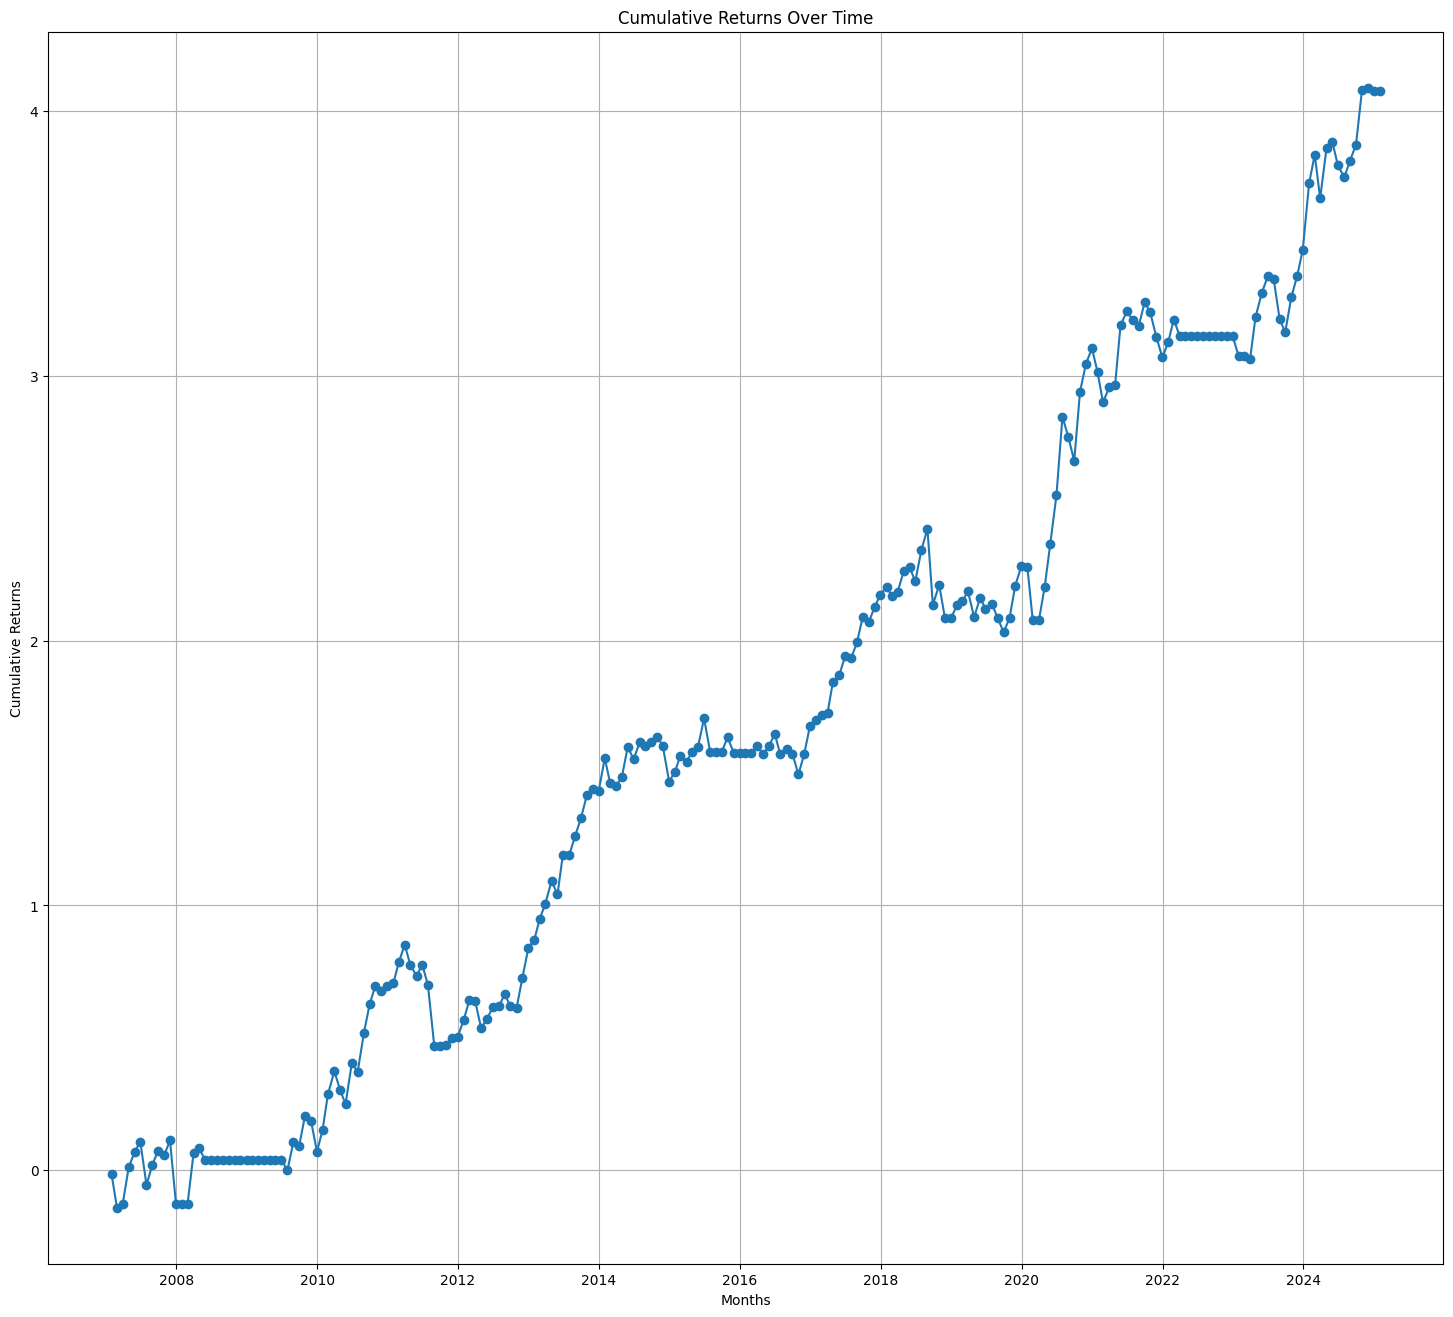

In [16]:
plot_returns(returns=returns)